# Exercise 3: Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the directed graph (rememeber, we asked you to keep one?).

# 1: What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

- Mean: The average number of connections (in or out). A high mean indicates that, on average, nodes are well-connected. In your network, a high mean in-degree could mean many artists are often referenced, while a high mean out-degree indicates active collaboration.

- Median: The middle value of connections. If the median is much lower than the mean, it shows most nodes have few connections, but a few outliers are highly connected, typical in real-world networks.

- Mode: The most common degree value. If the mode is low, most nodes have few connections, which is common when only a few key nodes dominate the network.

- Minimum: The least connected node(s). These nodes are isolated or rarely referenced.

- Maximum: The most connected node(s). These are key players in the network, either highly referenced (in-degree) or very active collaborators (out-degree).

In summary, these values help identify influential nodes and general patterns of connectivity in the network.

In [11]:
import os
import pickle

# Define the relative path to the pickle file
relative_folder_path = "shared"
file_name = "performer_network.pkl"
file_path = os.path.join(relative_folder_path, file_name)

# Load the graph from the specified file path
if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        G = pickle.load(f)
else:
    print(f"File not found: {file_path}")

# 2: Let's also look at the exponent of the degree distribution
### Use powerlaw.Fit(degree).alpha for fitting

Calculating best minimal value for power law fit
Power-law exponent (alpha): 2.9299949861024266


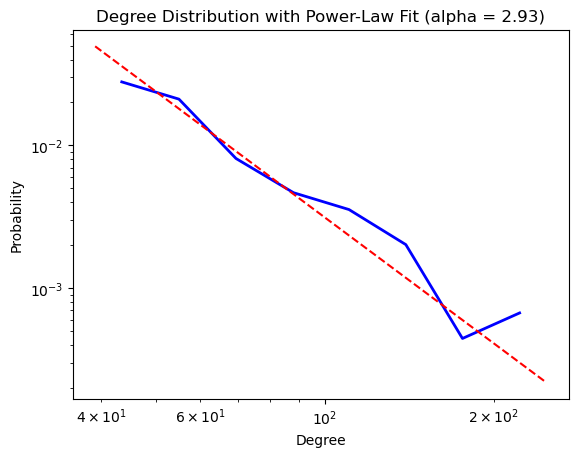

In [12]:
import networkx as nx
import powerlaw
import matplotlib.pyplot as plt

# Step 1: Get the degree distribution (in-degree or out-degree) from the graph
# Here we use the combined degree (sum of in-degree and out-degree)
degrees = [G.degree(n) for n in G.nodes()]

# Step 2: Fit a power-law distribution to the degree distribution
fit = powerlaw.Fit(degrees)

# Step 3: Access the power-law exponent (alpha)
alpha = fit.alpha
print(f"Power-law exponent (alpha): {alpha}")

# Step 4: Plot the degree distribution and the fitted power-law
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
plt.title(f"Degree Distribution with Power-Law Fit (alpha = {alpha:.2f})")
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.show()


### Find the degree exponent for in-, out- and total- degree distribution. What does it say about our network?

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Power-law exponent for in-degree: 2.4115526912809218
Power-law exponent for out-degree: 5.088052152186097
Power-law exponent for total degree: 2.9299949861024266


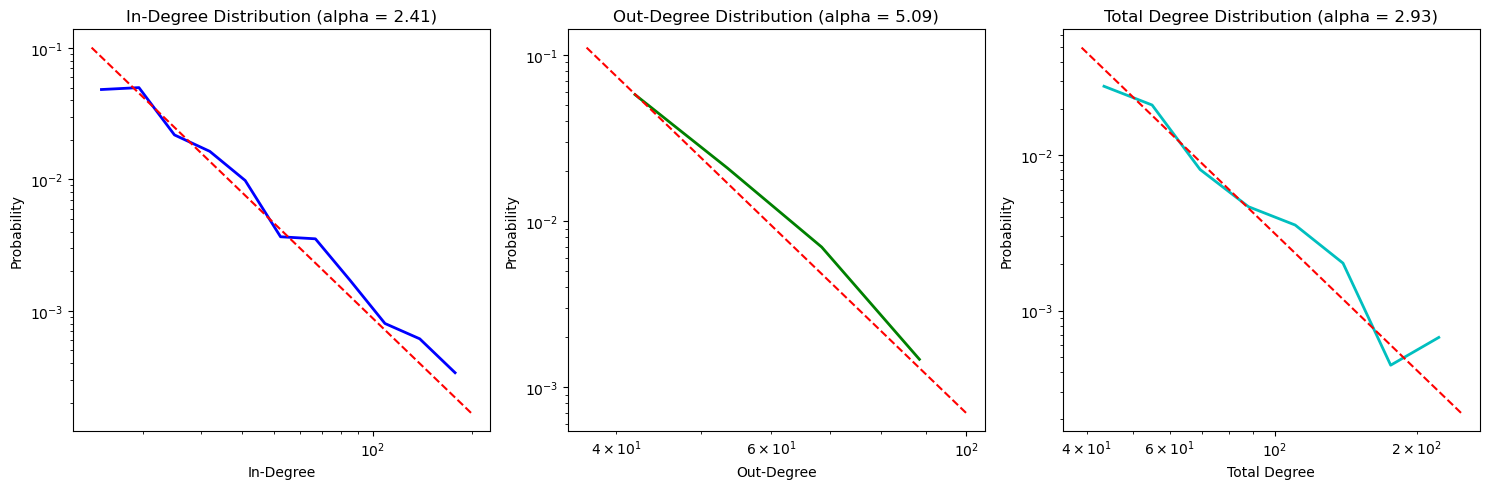

In [13]:


# Step 1: Extract in-degree, out-degree, and total-degree distributions
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]
total_degrees = [G.degree(n) for n in G.nodes()]  # Combined degree

# Step 2: Fit power-law to each distribution
in_fit = powerlaw.Fit(in_degrees)
out_fit = powerlaw.Fit(out_degrees)
total_fit = powerlaw.Fit(total_degrees)

# Step 3: Access the alpha values
alpha_in = in_fit.alpha
alpha_out = out_fit.alpha
alpha_total = total_fit.alpha

print(f"Power-law exponent for in-degree: {alpha_in}")
print(f"Power-law exponent for out-degree: {alpha_out}")
print(f"Power-law exponent for total degree: {alpha_total}")

# Optional: Plot the degree distributions with power-law fit
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
in_fit.plot_pdf(color='b', linewidth=2)
in_fit.power_law.plot_pdf(color='r', linestyle='--')
plt.title(f"In-Degree Distribution (alpha = {alpha_in:.2f})")
plt.xlabel("In-Degree")
plt.ylabel("Probability")

plt.subplot(1, 3, 2)
out_fit.plot_pdf(color='g', linewidth=2)
out_fit.power_law.plot_pdf(color='r', linestyle='--')
plt.title(f"Out-Degree Distribution (alpha = {alpha_out:.2f})")
plt.xlabel("Out-Degree")
plt.ylabel("Probability")

plt.subplot(1, 3, 3)
total_fit.plot_pdf(color='c', linewidth=2)
total_fit.power_law.plot_pdf(color='r', linestyle='--')
plt.title(f"Total Degree Distribution (alpha = {alpha_total:.2f})")
plt.xlabel("Total Degree")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()


### Conclusion:

The power-law exponents for the network indicate a **scale-free structure**, but with varying characteristics for in-degree, out-degree, and total degree distributions:

- **In-Degree (α = 2.41)**: This suggests that a few nodes in the network act as **hubs**, receiving many incoming links (e.g., references, mentions), while most nodes receive far fewer. This is typical of networks where a small number of entities are highly influential or authoritative.
  
- **Out-Degree (α = 5.09)**: A high exponent for out-degree indicates that most nodes link to only a few other nodes, with very few nodes having a high number of outgoing links. This suggests that few nodes actively contribute or reference many others, while most are more passive in linking.

- **Total Degree (α = 2.93)**: The total-degree exponent shows a balance between in- and out-links. The network overall still exhibits a **scale-free nature**, with a few nodes dominating connections, but not to the same extreme as out-degree alone.

In summary, the network is scale-free, with **central hubs** receiving most attention, while the activity of linking to many others is less common.

### When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?

the in-degree distribution indicated that most performers are referenced by a small number of others, with a few central hubs receiving many references. This is confirmed by the in-degree power-law exponent (α = 2.41), which reflects the presence of highly influential performers in the network.

Similarly, the out-degree distribution last week showed that most performers reference only a few others, but a small number of performers reference many others, acting as collaborative hubs. This is consistent with the higher out-degree exponent (α = 5.09), highlighting that few performers link to many others.

Both analyses support the same conclusion: the network exhibits a scale-free structure, with a few central hubs dominating the connectivity.

### A long time ago, a group of scientists analyzed the network spanned by ***all** of Wikipedia (the paper is called Wikipedias: Collaborative web-based encyclopedias as complex networks; to access this paper, use findit.dtu.dk or read the preprint on arXiv). Do your findings correspond to the results described in Chapter III.A of that paper? If not, try to give your explanation of why?

1. **In-degree Distribution**:
   - The paper reports an average in-degree exponent ($y_{in}$) of around **2.15**, which is consistent with our **in-degree exponent (α = 2.41)**. Both analyses show that a small number of nodes (articles) receive many incoming links, confirming the **hub-like nature** of certain nodes in Wikipedia.

2. **Out-degree Distribution**:
   - The paper gives an average out-degree exponent ($y_{out}$) of **2.57**, while our network analysis resulted in a much higher exponent (**α = 5.09**). This discrepancy suggests that in our network, most nodes have very few outgoing links, and only a very small number of nodes contribute many outgoing links. One possible explanation is that our dataset might involve more specialized or less densely connected topics than the overall Wikipedia network, or there could be some biases in the structure of our network sample.

3. **Total Degree Distribution**:
   - The paper reports a total degree exponent ($y_{undirected}$) of **2.35**, and our analysis yielded **α = 2.93**. While these values are close, the slightly higher exponent in our network suggests a slightly more constrained degree distribution, with fewer highly connected nodes than in Wikipedia as a whole.

### Conclusion:
Our findings largely match the results from the paper, especially for the **in-degree** and **total degree** distributions. The difference in the **out-degree** exponent might stem from differences in the structure of our network sample compared to the global structure of Wikipedia. For instance, if our network represents a more specialized subset of articles or entities, it might explain the limited outgoing links observed.

# 3. Plot a heatmap (Hint here) of the the in- versus out- degree for all characters. Zoom in on just the in-degree [0, 20] and out-degree [0, 20] area of the plot. What is the advantage of using a heatmap over the scatter plot from the previous Exercise (especially for understanding what's going on in this area)?

While the scatter plot allows you to see individual points, it becomes less effective when there is a large overlap or concentration of nodes in certain areas. The heatmap provides a more effective way to visualize the density and distribution of nodes in crowded areas, giving you a clearer understanding of where nodes are concentrated within a certain range of degrees (in this case, [0, 20] for both in-degree and out-degree).

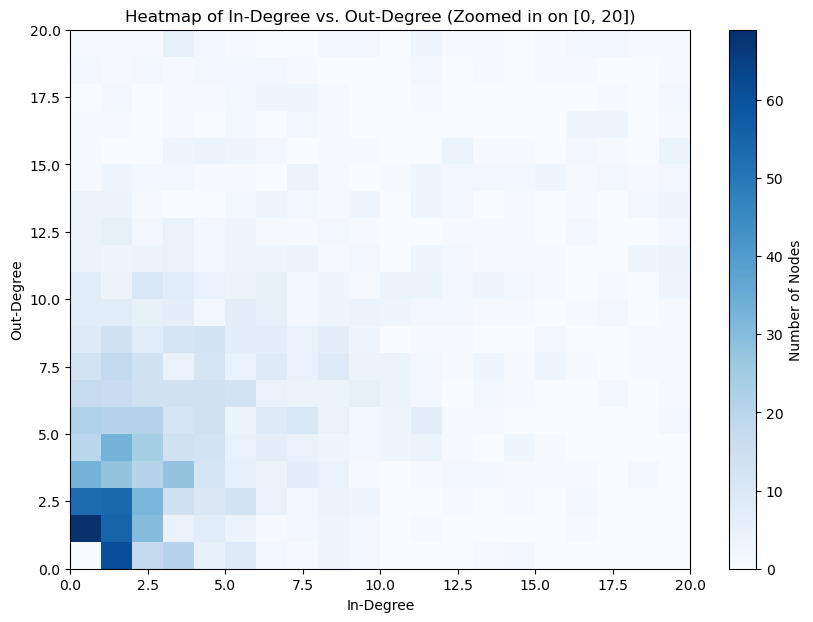

In [14]:
# Step 1: Get the in-degree and out-degree for all nodes
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

# Step 2: Create a heatmap (2D histogram) for in-degree and out-degree
plt.figure(figsize=(10, 7))

# Create a 2D histogram for the in-degree vs out-degree data
plt.hist2d(in_degrees, out_degrees, bins=[20, 20], range=[[0, 20], [0, 20]], cmap='Blues')

# Add color bar for scale
plt.colorbar(label='Number of Nodes')

# Step 3: Set plot labels and title
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.title('Heatmap of In-Degree vs. Out-Degree (Zoomed in on [0, 20])')

# Show the plot
plt.show()


# 4.Why do you think I want you guys to use a directed graph? Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.


Directed graphs are essential when the direction of relationships provides critical information, such as influence, authority, collaboration, or information flow. They allow us to ask nuanced questions about who influences whom, the flow of information, and the difference between hubs and authorities.
In cases where the relationships are mutual, or when focusing on community detection and overall network connectivity, the in/out distinction is less relevant, and an undirected graph may be sufficient.


# 5.We have one more metric that we have used, but not investigated so far. The node-attribute length_of_content. There are two things to look at.

### Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree. Does it?

Pearson correlation between word_count and out-degree: 0.43, p-value: 6.50e-89


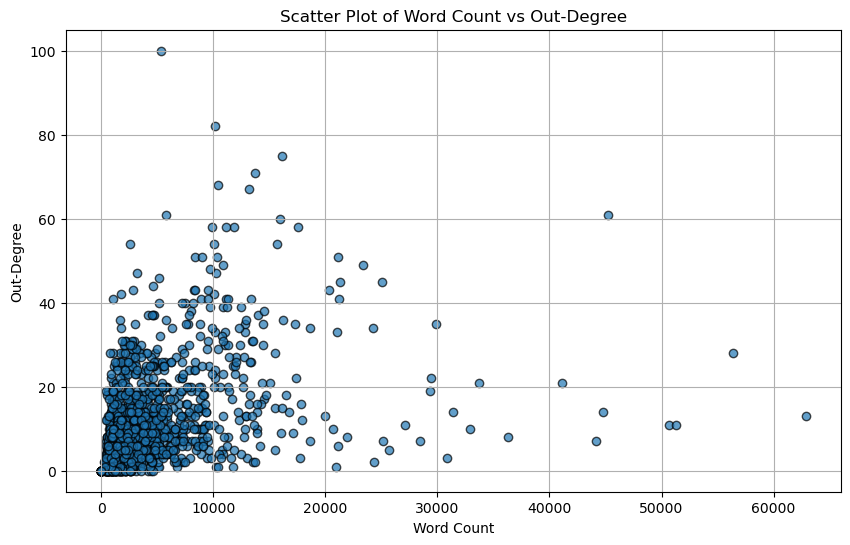

In [28]:
# Initialize the out-degrees and word_count lists
out_degrees = []
word_count = []

# Get the out-degree and word_count for all nodes, setting word_count to 0 if missing
for node in G.nodes():
    out_degrees.append(G.out_degree(node))
    word_count.append(G.nodes[node].get('word_count', 0))  # Default to 0 if missing

# Calculate Pearson correlation between out-degree and word_count
correlation, p_value = pearsonr(word_count, out_degrees)
print(f"Pearson correlation between word_count and out-degree: {correlation:.2f}, p-value: {p_value:.2e}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(word_count, out_degrees, alpha=0.7, edgecolor='k')
plt.xlabel('Word Count')
plt.ylabel('Out-Degree')
plt.title('Scatter Plot of Word Count vs Out-Degree')
plt.grid(True)
plt.show()

Based on the correlation of 0.43, we can conclude that nodes with longer content (higher word_count) generally have a higher number of outgoing links (out-degree). While the relationship is moderate, it is statistically significant. The result supports the hypothesis that longer articles or content pieces tend to reference more other articles.

#### Secondly, and more interestingly, it could be that longer texts means more famous characters. And that means more in-links.

The positive correlation between word_count and in-degree supports the idea that longer texts tend to represent more famous or important characters, who receive more in-links
In other words, characters that are more well-known or important tend to have more content written about them, and they also tend to be referenced more within the network.

Pearson correlation between word_count and in-degree: 0.53, p-value: 3.21e-142


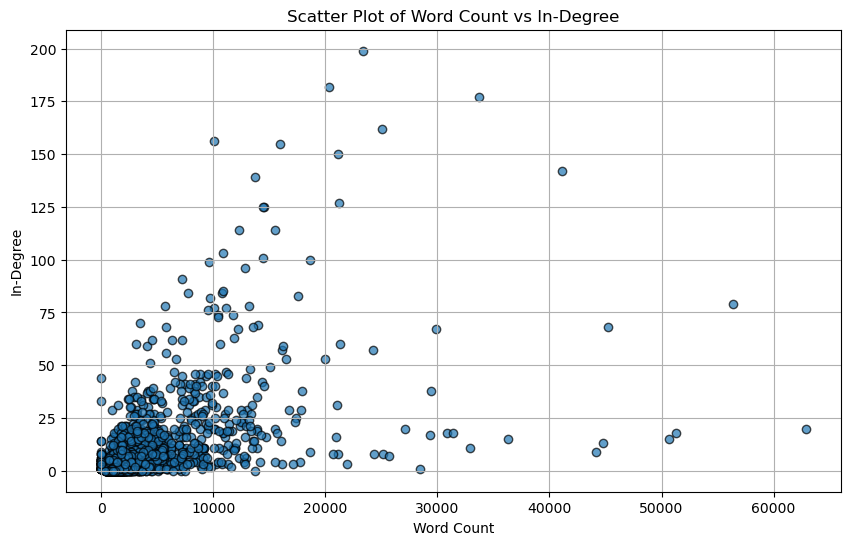

In [46]:

import numpy as np
from scipy.stats import pearsonr

# Initialize the in-degrees and word_count lists
in_degrees = []
word_count = []

# Get the in-degree and word_count for all nodes, setting word_count to 0 if missing
for node in G.nodes():
    in_degrees.append(G.in_degree(node))  # Get in-degree of the node
    word_count.append(G.nodes[node].get('word_count', 0))  # Get word_count, default to 0 if missing

# Calculate Pearson correlation between in-degree and word_count
correlation, p_value = pearsonr(word_count, in_degrees)
print(f"Pearson correlation between word_count and in-degree: {correlation:.2f}, p-value: {p_value:.2e}")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(word_count, in_degrees, alpha=0.7, edgecolor='k')
plt.xlabel('Word Count')
plt.ylabel('In-Degree')
plt.title('Scatter Plot of Word Count vs In-Degree')
plt.grid(True)
plt.show()


### How should you test this? Well, here you are allowed to be creative. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using spearman or pearson correlations, fit a curve to the data, you decide). Once you've tested, let me know. Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.

In [30]:
from scipy.stats import spearmanr

# Pearson correlation for in-degree and word_count
pearson_in, p_val_in = pearsonr(word_count, in_degrees)
spearman_in, sp_p_val_in = spearmanr(word_count, in_degrees)

# Pearson correlation for out-degree and word_count
pearson_out, p_val_out = pearsonr(word_count, out_degrees)
spearman_out, sp_p_val_out = spearmanr(word_count, out_degrees)

# Print the results for both in-degree and out-degree
print(f"Pearson correlation for in-degree: {pearson_in:.2f}, p-value: {p_val_in:.2e}")
print(f"Spearman correlation for in-degree: {spearman_in:.2f}, p-value: {sp_p_val_in:.2e}")
print(f"Pearson correlation for out-degree: {pearson_out:.2f}, p-value: {p_val_out:.2e}")
print(f"Spearman correlation for out-degree: {spearman_out:.2f}, p-value: {sp_p_val_out:.2e}")


Pearson correlation for in-degree: 0.53, p-value: 3.21e-142
Spearman correlation for in-degree: 0.61, p-value: 2.58e-194
Pearson correlation for out-degree: 0.43, p-value: 6.50e-89
Spearman correlation for out-degree: 0.59, p-value: 1.43e-180


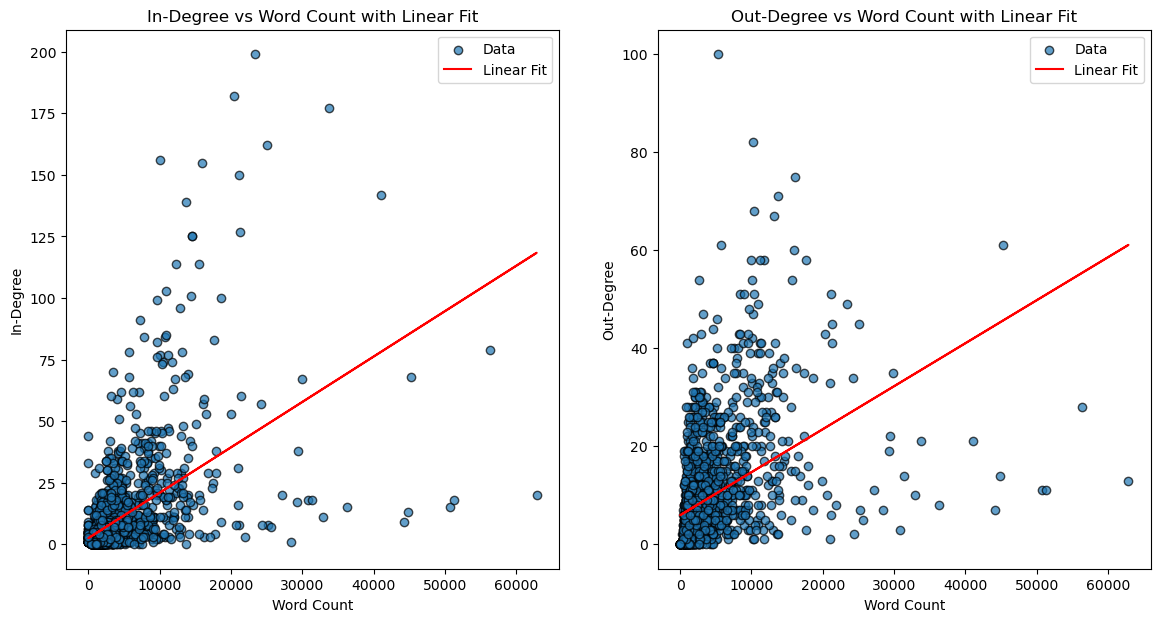

In [31]:
from numpy.polynomial.polynomial import Polynomial
from sklearn.linear_model import LinearRegression

# Fit linear regression model for in-degree
X_in = np.array(word_count).reshape(-1, 1)
y_in = np.array(in_degrees)
reg_in = LinearRegression().fit(X_in, y_in)
y_in_pred = reg_in.predict(X_in)

# Fit linear regression model for out-degree
X_out = np.array(word_count).reshape(-1, 1)
y_out = np.array(out_degrees)
reg_out = LinearRegression().fit(X_out, y_out)
y_out_pred = reg_out.predict(X_out)

# Plot both in-degree and out-degree relationships
plt.figure(figsize=(14, 7))

# In-degree plot
plt.subplot(1, 2, 1)
plt.scatter(word_count, in_degrees, alpha=0.7, edgecolor='k', label="Data")
plt.plot(word_count, y_in_pred, color='red', label="Linear Fit")
plt.xlabel('Word Count')
plt.ylabel('In-Degree')
plt.title('In-Degree vs Word Count with Linear Fit')
plt.legend()

# Out-degree plot
plt.subplot(1, 2, 2)
plt.scatter(word_count, out_degrees, alpha=0.7, edgecolor='k', label="Data")
plt.plot(word_count, y_out_pred, color='red', label="Linear Fit")
plt.xlabel('Word Count')
plt.ylabel('Out-Degree')
plt.title('Out-Degree vs Word Count with Linear Fit')
plt.legend()

plt.show()


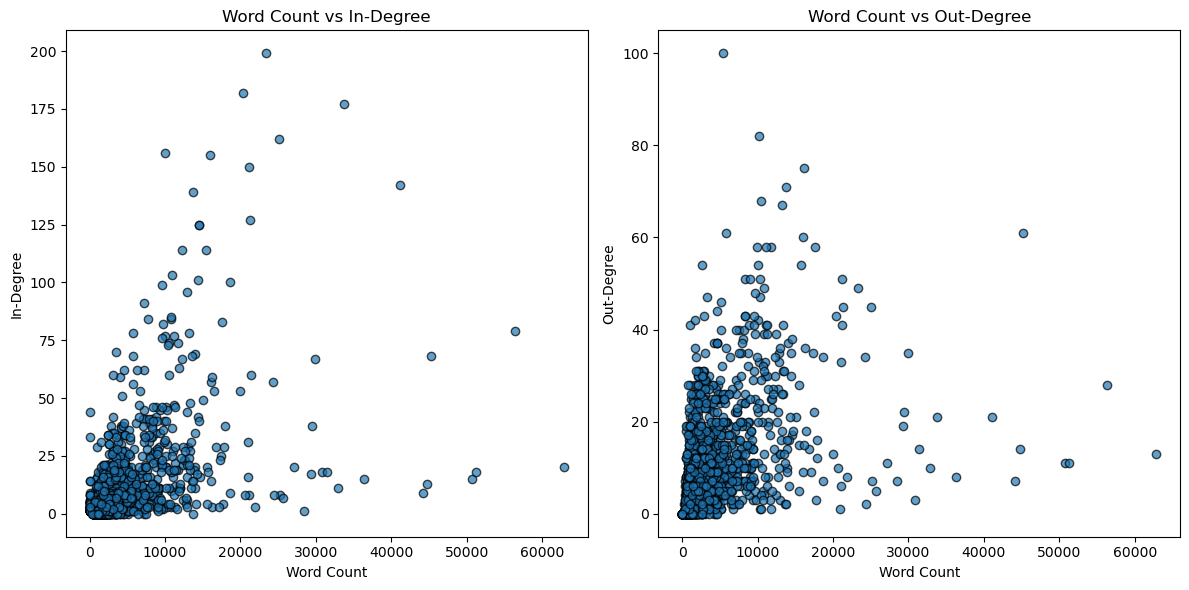

In [32]:
# Plot side-by-side scatter plots for in-degree and out-degree with word_count
plt.figure(figsize=(12, 6))

# In-degree plot
plt.subplot(1, 2, 1)
plt.scatter(word_count, in_degrees, alpha=0.7, edgecolor='k')
plt.xlabel('Word Count')
plt.ylabel('In-Degree')
plt.title('Word Count vs In-Degree')

# Out-degree plot
plt.subplot(1, 2, 2)
plt.scatter(word_count, out_degrees, alpha=0.7, edgecolor='k')
plt.xlabel('Word Count')
plt.ylabel('Out-Degree')
plt.title('Word Count vs Out-Degree')

plt.tight_layout()
plt.show()


Both questions are true:Longer texts lead to more out-links (activity): There’s a moderate positive correlation, meaning characters with longer texts tend to reference more others.
Longer texts lead to more in-links (fame): There’s a stronger positive correlation, indicating that characters with longer texts are referenced more often by others.
Which phenomenon is stronger?
The in-degree correlation is stronger than the out-degree, showing that longer texts are more closely tied to fame. Characters with more content are referenced more frequently (higher in-degree) than they reference others (out-degree). In short, fame has a stronger relationship with text length than activity.

# Exercise 4: Centralities, assortativity and more

In [47]:
# Calculate degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Sort the nodes by degree centrality in descending order and get the top 5
top_5_central_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 most central characters
for node, centrality in top_5_central_nodes:
    print(f"Character: {node}, Degree Centrality: {centrality:.4f}")


Character: Willie Nelson, Degree Centrality: 0.1280
Character: Johnny Cash, Degree Centrality: 0.1161
Character: Merle Haggard, Degree Centrality: 0.1109
Character: George Jones, Degree Centrality: 0.1084
Character: Vince Gill, Degree Centrality: 0.1084


In [48]:
# Step 1: Calculate betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(G)

# Step 2: Sort nodes by betweenness centrality in descending order and get the top 5
top_5_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 most central characters according to betweenness centrality
print("Top 5 characters by Betweenness Centrality:")
for node, centrality in top_5_betweenness_nodes:
    print(f"Character: {node}, Betweenness Centrality: {centrality:.4f}")


Top 5 characters by Betweenness Centrality:
Character: Vince Gill, Betweenness Centrality: 0.0375
Character: Merle Haggard, Betweenness Centrality: 0.0354
Character: Willie Nelson, Betweenness Centrality: 0.0320
Character: Johnny Cash, Betweenness Centrality: 0.0290
Character: Toby Keith, Betweenness Centrality: 0.0276


100%|██████████| 2000/2000 [00:48<00:00, 41.34it/s]


BarnesHut Approximation  took  8.49  seconds
Repulsion forces  took  37.85  seconds
Gravitational forces  took  0.20  seconds
Attraction forces  took  0.19  seconds
AdjustSpeedAndApplyForces step  took  0.89  seconds


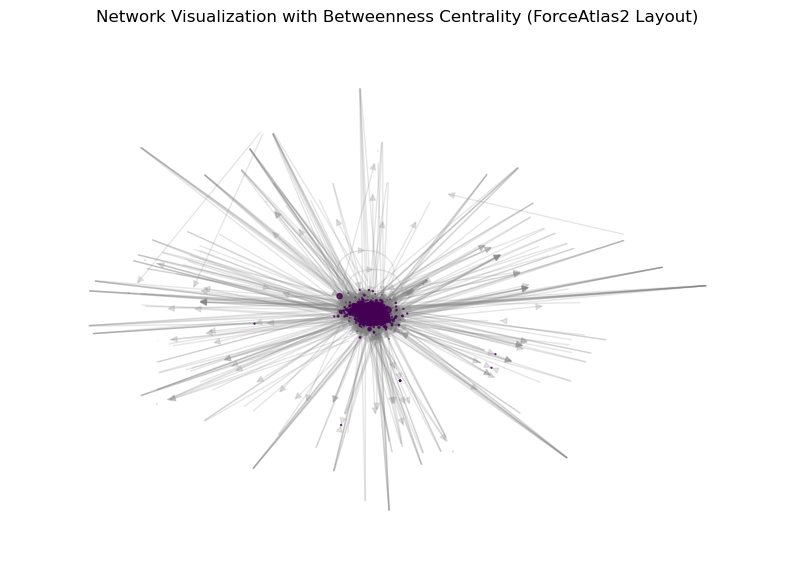

In [49]:
from fa2_modified import ForceAtlas2  

# Step 1: Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Step 2: Initialize ForceAtlas2
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=True, 
    linLogMode=False,  
    adjustSizes=False, 
    edgeWeightInfluence=1.0,

    # Performance options
    jitterTolerance=1.0,  
    barnesHutOptimize=True,  
    barnesHutTheta=1.2,  
    multiThreaded=False, 

    # Tuning options
    scalingRatio=2.0,  
    strongGravityMode=False,  
    gravity=1.0,  

    # Verbose logging
    verbose=True
)

# Step 3: Run the ForceAtlas2 layout algorithm
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

# Step 4: Calculate the range of 'length_of_content' values for color mapping
length_values = [G.nodes[node].get('length_of_content', 0) for node in G.nodes]
min_length = min(length_values)
max_length = max(length_values)

# Set node colors and sizes
node_colors = []
node_sizes = []

for node in G.nodes:
    # Get the node's 'length_of_content' attribute (default to 0 if missing)
    length_of_content = G.nodes[node].get('length_of_content', 0)

    # Normalize the 'length_of_content' values for color scaling
    if max_length != min_length:
        color_value = (length_of_content - min_length) / (max_length - min_length)  # Normalized
    else:
        color_value = 0  # If all values are the same, default to 0

    # Choose colormap (e.g., 'viridis', 'plasma', or 'inferno')
    node_colors.append(plt.cm.viridis(color_value))  # Change colormap here if needed

    # Set node size based on betweenness centrality (scaled for visibility)
    node_size = betweenness_centrality[node] * 1000  # Scaling factor for visibility
    node_sizes.append(node_size)

# Step 5: Visualize the graph using NetworkX and matplotlib
plt.figure(figsize=(10, 7))

# Draw the nodes and edges
nx.draw_networkx_nodes(G, positions, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, positions, edge_color="gray", alpha=0.2)

# Remove axis and show the plot
plt.axis('off')
plt.title("Network Visualization with Betweenness Centrality (ForceAtlas2 Layout)")
plt.show()


### What role do you imagine characters with high wikipedia graph betweenness centrality play in the network?

Characters with high betweenness centrality often control information flow and connect different groups. They might be key historical figures or well-known collaborators who link otherwise distant individuals or groups in the network, making them strategically important for communication.

## 3.Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).